In [ ]:
!pip install sklearn_time
!pip install snapml

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

In [3]:
url ='D:\DataSci\Resources\creditcard.csv'
raw_data=pd.read_csv(url)
raw_data.shape

(284807, 31)

In [4]:
raw_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, 10, axis=0), columns=raw_data.columns)

In [6]:
big_raw_data.shape

(2848070, 31)

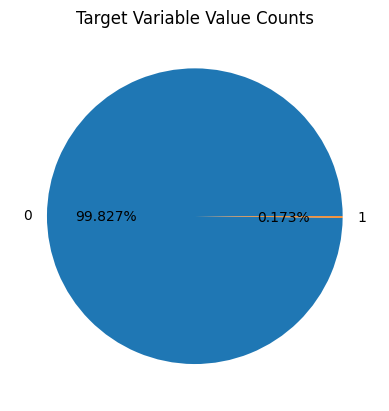

In [15]:
sizes = big_raw_data.Class.value_counts().values
labels =[0,1]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

C:\Users\Ojas\AppData\Local\Temp\ipykernel_4212\3991573169.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_raw_data['Amount'].values)


<Axes: ylabel='Density'>

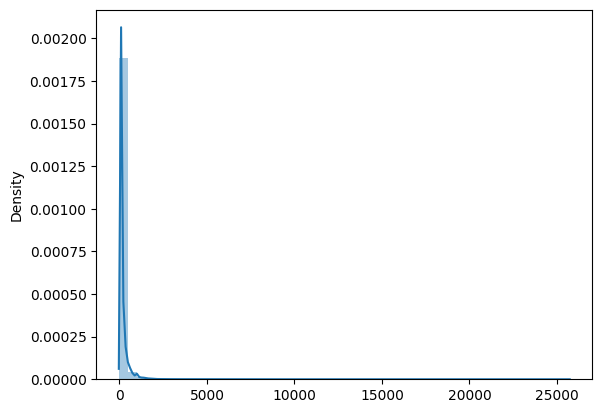

In [18]:
import seaborn as sns
sns.distplot(big_raw_data['Amount'].values)

In [19]:
np.percentile(big_raw_data.Amount.values, 90)

203.0

In [20]:
big_raw_data.iloc[:,1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:,1:30])
data_matrix = big_raw_data.values

In [21]:
data_matrix[0:5,:]

array([[ 0.        , -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426,
         0.        ],
       [ 0.        , -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426,
         0.        ],
       [ 0.        , -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
       

In [22]:
X = data_matrix[:, 1:30]

In [23]:
y= data_matrix[:, 30]

In [24]:
X = normalize(X, norm='l1')

In [25]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

In [26]:
w_train = compute_sample_weight('balanced', y_train)